### Library

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import platform
import numpy as np
import warnings
from matplotlib import font_manager, rc

path = '/library/Fonts/Arial Unicode.ttf'

if platform.system() == 'Darwin':
    print('Hangul OK in your MAC!')
    rc('font', family='Arial Unicode MS')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system.. sorry')

plt.rcParams['axes.unicode_minus'] = False

# Data load
df = pd.read_csv('../data/gapminder.tsv', sep='\t')
df

Hangul OK in your MAC!


,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


### 기초통계

In [2]:
# 기초통계 확인
df[['lifeExp']].describe()

,lifeExp
count,1704.000000
mean,59.474439
std,12.917107
min,23.599000
25%,48.198000
50%,60.712500
75%,70.845500
max,82.603000


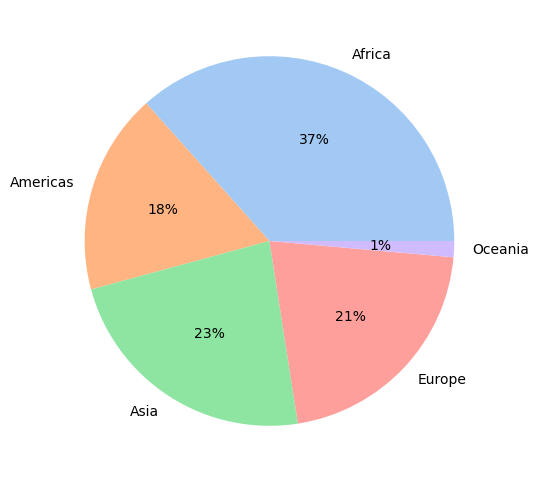

In [3]:
# 대륙별 파이차트
df_group = df.groupby('continent').size()
labels = df_group.index
sizes = df_group.values
colors = sns.color_palette('pastel')[0:5]

plt.figure(figsize=(8, 6))
plt.pie(df_group, labels=labels, colors=colors, autopct='%.0f%%')
plt.show()

### 분포 확인

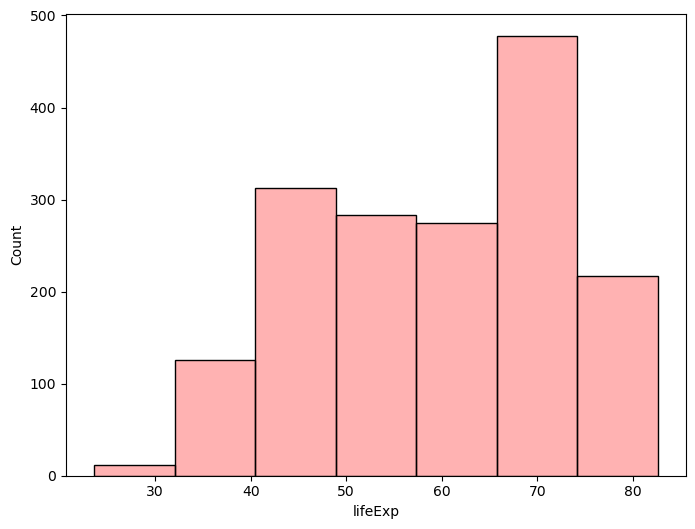

In [4]:
# 분포 확인
plt.figure(figsize=(8, 6))
sns.histplot(df['lifeExp'], alpha = 0.3, bins=7, color='Red')
plt.show()

### 이상치 확인

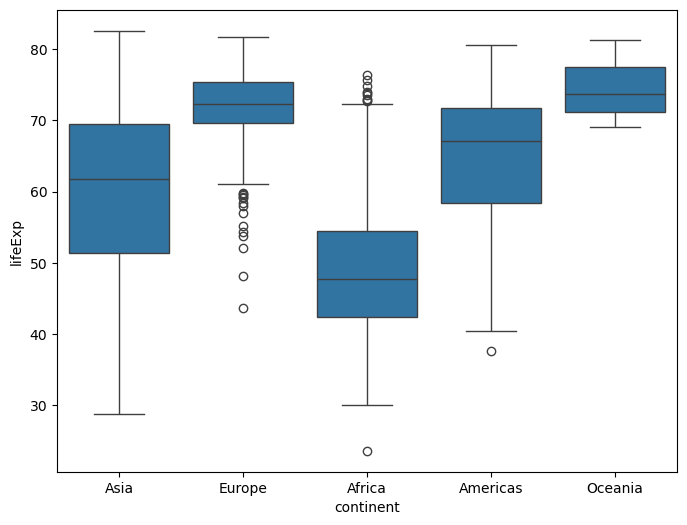

In [4]:
# 이상치 확인
plt.figure(figsize=(8, 6))
sns.boxplot(x='continent', y='lifeExp', data=df)
plt.show()

### 정규분포 생성

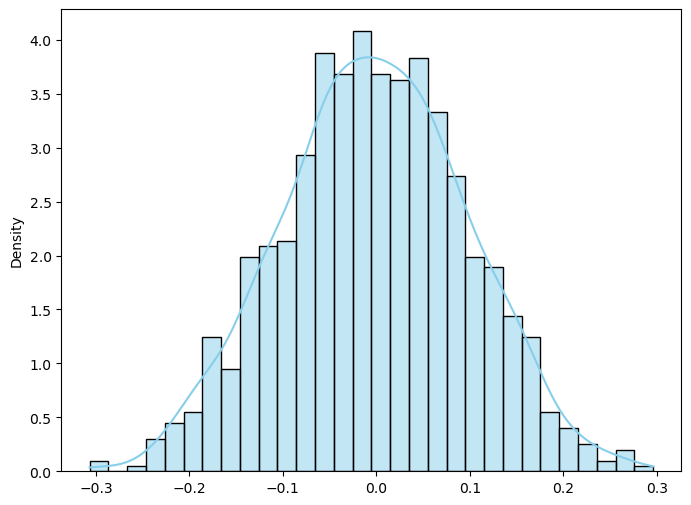

In [ ]:
mu, sigma = 0, 0.1
s = np.random.normal(mu, sigma, 1000)

plt.figure(figsize=(8, 6))
sns.histplot(s, bins=30, kde=True, color="skyblue", stat="density")
plt.show()

### 왜도 & 첨도

- **왜도**: 자료의 분포가 어느 정도로 **비대칭적으로** 분포되어 있는지를 나타내는 통계 지표
- **첨도**: 첨도는 분포곡선의 **봉우리가 얼마나 뾰족한지를** 나타내는 수치

![](2025-04-04-17-13-48.png)

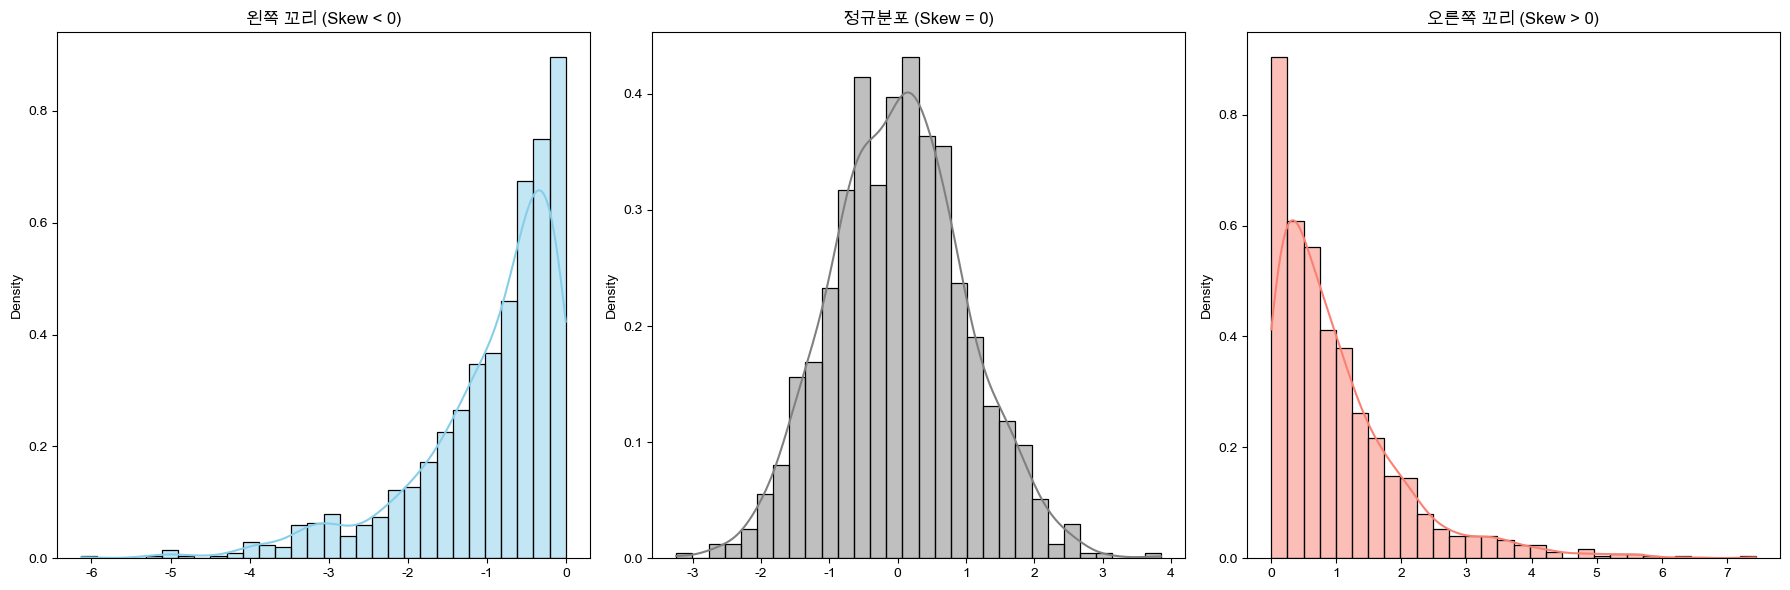

In [20]:
warnings.filterwarnings('ignore')

# 데이터 생성
np.random.seed(42)
normal_data = np.random.normal(loc=0, scale=1, size=1000) # 정규분포
right_skewed = np.random.exponential(scale=1.0, size=1000) # 오른쪽 꼬리
left_skewed = -1 * np.random.exponential(scale=1.0, size=1000) # 왼쪽 꼬리

# 시각화
plt.figure(figsize=(18, 6))

# 1. 왼쪽 꼬리 분포
plt.subplot(1, 3, 1)
sns.histplot(left_skewed, bins=30, kde=True, color='skyblue', stat="density")
plt.title("왼쪽 꼬리 (Skew < 0)")

# 2. 정규분포
plt.subplot(1, 3, 2)
sns.histplot(normal_data, bins=30, kde=True, color='gray', stat="density")
plt.title("정규분포 (Skew = 0)")

# 3. 오른쪽 꼬리 분포
plt.subplot(1, 3, 3)
sns.histplot(right_skewed, bins=30, kde=True, color='salmon', stat="density")
plt.title("오른쪽 꼬리 (Skew > 0)")

plt.tight_layout()
plt.show()